###This series of plots demonstrates some issues with bias on ellipticity arising from cuts in radius, SNR, or related quantities

In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from plot_hist import binned_trend
from astropy.table import Table
figsize(6,6)

###The catalog we load is a set of results from a series of objects (with different ellipticities but identical signal to noise and radius) that Mike Jarvis put together. There were two sets of simulations; we use the lower SNR one here (SNR~35)

###The true e is known and is derived from the j value.

### The first thing we demonstrate is that the measured radius does not vary with the true ellipticity, but does vary with measured ellipticity; that is, that measurements of radius and ellipticity co-vary.

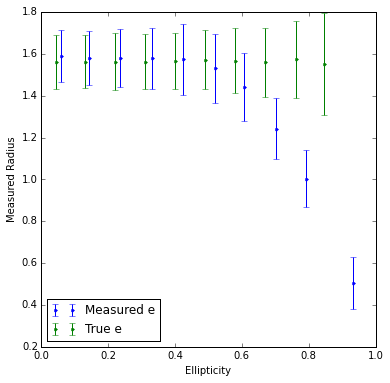

In [27]:
cat500 = Table.read("results_500.fits")

e= (cat500['e1']**2 + cat500['e2']**2)**0.5
e_true = cat500['j']*0.009

snr = cat500['snr']
round_snr = cat500['round_snr']
binned_trend(e, cat500['radius'], 'Measured e')
binned_trend(e_true, cat500['radius'], 'True e')

xlabel("Ellipticity")
ylabel("Measured Radius")
legend(loc='lower left')


### Now we show that a similar effect applies to measured signal-to-noise, and that this is present on both original SNR and rounded SNR for generally moderate values of both. First we show that both are biased when measured in bins of measred ellipticity

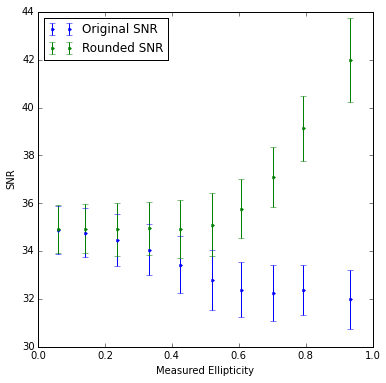

In [33]:
snr = cat500['snr']
round_snr = cat500['round_snr']
binned_trend(e, snr, 'Original SNR')
binned_trend(e, round_snr, 'Rounded SNR')
xlabel("Measured Ellipticity")
ylabel("SNR")
legend(loc='upper left')

### But that for true ellipticity only the original SNR is biased; the round SNR is not

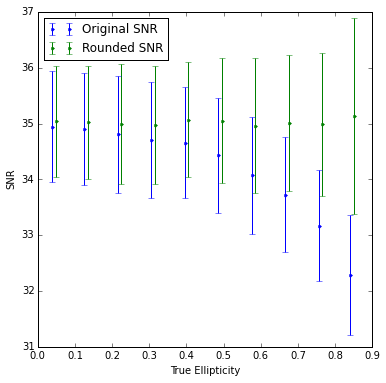

In [34]:
snr = cat500['snr']
round_snr = cat500['round_snr']
binned_trend(e_true-0.005, snr, 'Original SNR')
binned_trend(e_true+0.005, round_snr, 'Rounded SNR')
xlabel("True Ellipticity")
ylabel("SNR")
legend(loc='upper left')

### We now show where this comes from - objects that scatter up in shear also scatter up in signal-to-noise

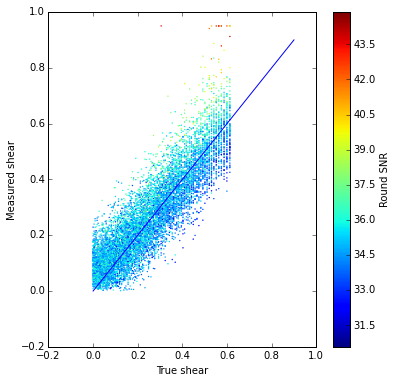

In [35]:
e = (cat500['e1']**2 + cat500['e2']**2)**0.5
g_true = e_true/(1+sqrt(1-e_true**2))
scatter(g_true, e, c=cat500['round_snr'], s=2, lw=0)
xlabel("True shear")
ylabel("Measured shear")
colorbar(label="Round SNR")
plot(arange(0,1,0.1), arange(0,1,0.1))

In [38]:
theta = np.radians(cat500['i']*3.6)
e1_true = e_true*cos(2*theta)
e2_true = e_true*sin(2*theta)

###This is the same effect shown in radius.  It is also more clear here that a small fraction of extreme outliers drive some of this effect, though not all

(0, 1)

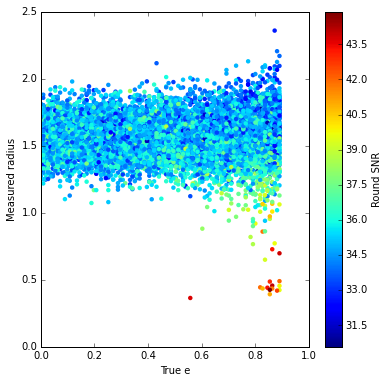

In [37]:
e = (cat500['e1']**2 + cat500['e2']**2)**0.5
e_true = cat500['j']*0.009
g_true = e_true/(1+sqrt(1-e_true**2))
scatter(e_true, cat500['radius'], c=cat500['round_snr'], lw=0)
xlabel("True e")
ylabel("Measured radius")
colorbar(label='Round SNR')
xlim(0,1)

### We now come to some attempts to deal with this; the approach we looked at here didn't seem to work as well on the full GREAT-DES simulations, or on real data, though I'm not sure of the full status of this.

###In trying to isolate the outliers we plotted various quantities against each other, and came up with this in particular - the LevMar iteration count correlates well with large errors in radius (remember that the radii were all the same in reality

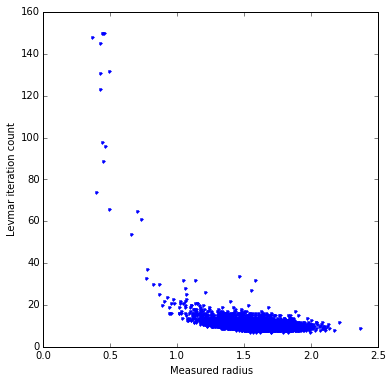

In [38]:
plot(cat500['radius'], cat500['levmar_iterations'],'.')
xlabel("Measured radius")
ylabel("Levmar iteration count")

### Here's another illustration of that, showing how measured ellipticity scatters with both of them

<matplotlib.colorbar.Colorbar instance at 0x109a3cc68>

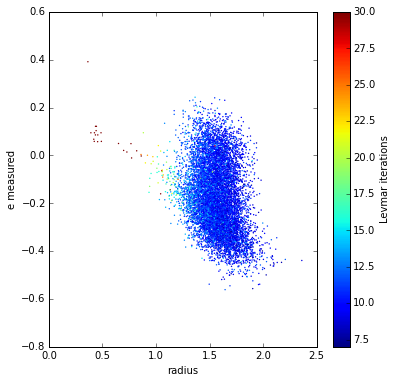

In [42]:
scatter(cat500['radius'], e-e_true, c=cat500['levmar_iterations'], s=2, lw=0, vmax=30)
xlabel("radius")
ylabel("e measured")
colorbar(label="Levmar iterations")


### And one final one, showing a split between the two populations of badly scattered, high-iteration values and the ellipticity error and measured radius.  Note that the red points are still correlated; this is biasing even without the black points

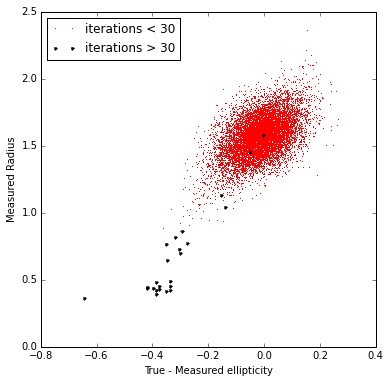

In [44]:
cut=cat500['levmar_iterations']<30
plot((g_true-e)[cut], cat500['radius'][cut],'r,', label='iterations < 30')
plot((g_true-e)[~cut], cat500['radius'][~cut],'k.', label='iterations > 30')
xlabel("True - Measured ellipticity")
ylabel("Measured Radius")
legend(loc='upper left')